|  Column name  |  Description  |
| ----- | ------- |
| Num_posts        | Number of total posts that the user has ever posted   |
| Num_following    | Number of following                                   |
| Num_followers    | Number of followers                                   |
| Biography_length | Length (number of characters) of the user's biography |
| Picture_availability | Value 0 if the user has no profile picture, or 1 if has |
| Link_availability| Value 0 if the user has no external URL, or 1 if has |
| Average_caption_length | The average number of character of captions in media |
| Caption_zero     | Percentage (0.0 to 1.0) of captions that has almost zero (<=3) length |
| Non_image_percentage | Percentage (0.0 to 1.0) of non-image media. There are three types of media on an Instagram post, i.e. image, video, carousel
| Engagement_rate_like | Engagement rate (ER) is commonly defined as (num likes) divide by (num media) divide by (num followers)
| Engagement_rate_comment | Similar to ER like, but it is for comments |
| Location_tag_percentage | Percentage (0.0 to 1.0) of posts tagged with location |
| Average_hashtag_count   | Average number of hashtags used in a post |
| Promotional_keywords | Average use of promotional keywords in hashtag, i.e. regrann, contest, repost, giveaway, mention, share, give away, quiz |
| Followers_keywords | Average use of followers hunter keywords in hashtag, i.e. follow, like, folback, follback, f4f|
| Cosine_similarity  | Average cosine similarity of between all pair of two posts a user has |
| Post_interval      | Average interval between posts (in hours) |
| real_fake          | r (real/authentic user), f (fake user/bought followers) |

# Q1: Import labraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Q2: Read instagram_users.csv file

In [2]:
df = pd.read_csv('/Users/hamadbinmohammed/Desktop/🟢 Study /2023 data science bootcamp/labs/Decision-Tree-Lab1/instagram_users.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64244 entries, 0 to 64243
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0    Num_posts               64244 non-null  int64  
 1   Num_following            64244 non-null  int64  
 2   Num_followers            64244 non-null  int64  
 3   Biography_length         64244 non-null  int64  
 4   Picture_availability     64244 non-null  int64  
 5   Link_availability        64244 non-null  int64  
 6   Average_caption_length   64244 non-null  int64  
 7   Caption_zero             64244 non-null  float64
 8   Non_image_percentage     64244 non-null  float64
 9   Engagement_rate_like     64244 non-null  float64
 10  Engagement_rate_comment  64244 non-null  float64
 11  Location_tag_percentage  64244 non-null  float64
 12  Average_hashtag_count    64244 non-null  float64
 13  Promotional_keywords     64244 non-null  float64
 14  Followers_keywords    

In [8]:
df.head()

,Num_posts,Num_following,Num_followers,Biography_length,Picture_availability,Link_availability,Average_caption_length,Caption_zero,Non_image_percentage,Engagement_rate_like,Engagement_rate_comment,Location_tag_percentage,Average_hashtag_count,Promotional_keywords,Followers_keywords,Cosine_similarity,Post_interval,real_fake
0,44,48,325,33,1,0,12,0.0,0.0,0.00,0.00,0.000,0.0,0.0,0.000,0.111111,0.094985,fake
1,10,66,321,150,1,0,213,0.0,1.0,14.39,1.97,0.000,1.5,0.0,0.000,0.206826,230.412857,fake
2,33,970,308,101,1,1,436,0.0,1.0,10.10,0.30,0.000,2.5,0.0,0.056,0.572174,43.569939,fake
3,70,86,360,14,1,0,0,1.0,0.0,0.78,0.06,0.000,0.0,0.0,0.000,1.000000,5.859799,fake
4,3,21,285,73,1,0,93,0.0,0.0,14.29,0.00,0.667,0.0,0.0,0.000,0.300494,0.126019,fake


# Q3: Split tha dataset into training and testing

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop('real_fake',axis=1)
y = df['real_fake']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Q4: Build three machine models 

## Q4.1: The first machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

# Building the Model - Decision Trees

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtree = DecisionTreeClassifier()

In [18]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
predictions = dtree.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        fake       0.85      0.86      0.86      9535
        real       0.86      0.86      0.86      9739

    accuracy                           0.86     19274
   macro avg       0.86      0.86      0.86     19274
weighted avg       0.86      0.86      0.86     19274



In [22]:
print(accuracy_score(y_test,predictions))

0.8570094427726471


In [23]:
print(confusion_matrix(y_test,predictions))

[[8173 1362]
 [1394 8345]]


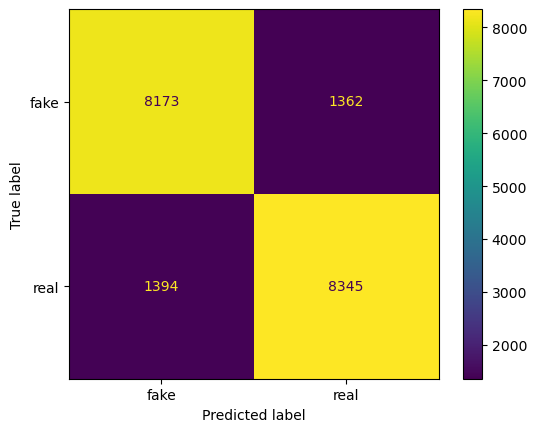

In [24]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtree, X_test, y_test)  
plt.show();

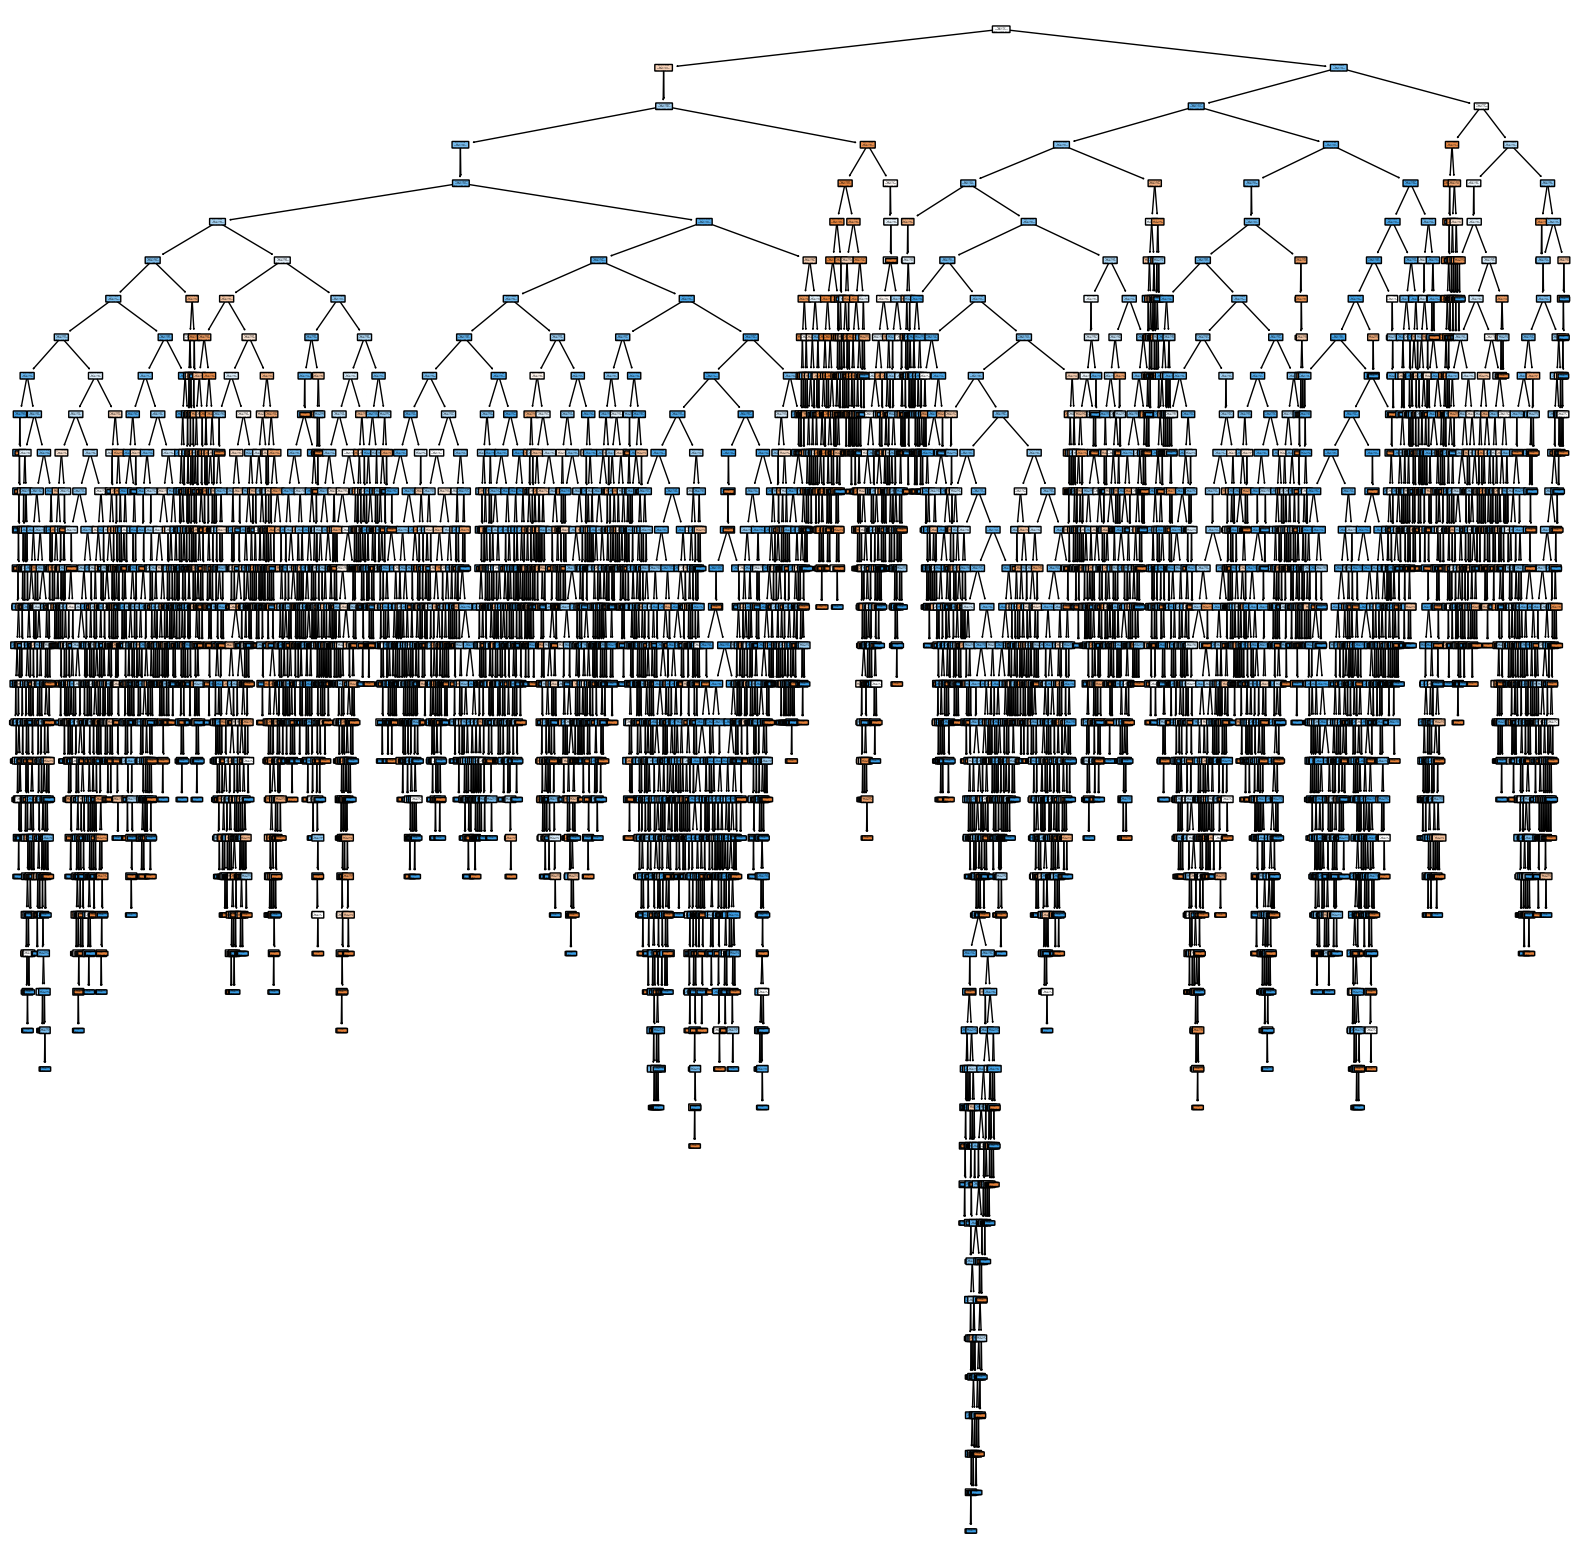

In [36]:
from sklearn import tree

plt.figure(figsize=(20,20))

tree.plot_tree(dtree, filled=True, rounded=True);

## Q4.2: The second machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

# Random Forests

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 20, criterion = 'gini', max_depth = 4) 
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=20)

In [31]:
rfc_pred = rfc.predict(X_test)

In [32]:
print(confusion_matrix(y_test,rfc_pred))

[[7318 2217]
 [ 255 9484]]


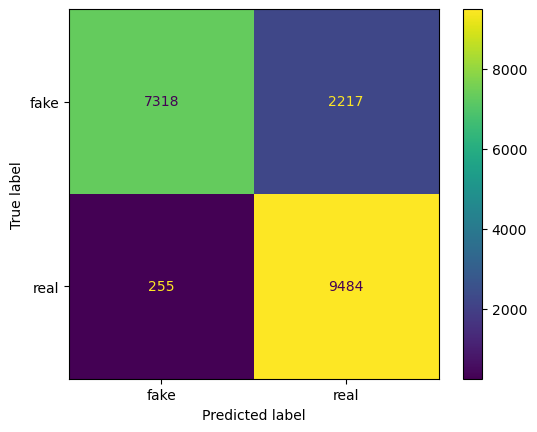

In [33]:
plot_confusion_matrix(rfc, X_test, y_test)  
plt.show()

In [34]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

        fake       0.97      0.77      0.86      9535
        real       0.81      0.97      0.88      9739

    accuracy                           0.87     19274
   macro avg       0.89      0.87      0.87     19274
weighted avg       0.89      0.87      0.87     19274



In [35]:
print(accuracy_score(y_test,rfc_pred))

0.8717443187714019


## Q4.3: The third machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

# Grid Search

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [10,20,30], 
    "criterion": ["gini", "entropy"],
    "max_depth": [2,4,6] 
    
}

grid = GridSearchCV(rfc, param_grid, cv = 5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=4, n_estimators=20),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6], 'n_estimators': [10, 20, 30]},
             verbose=1)

In [41]:
grid_df = pd.DataFrame(grid.cv_results_)
grid_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.344700,0.005026,0.038052,0.001441,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",0.865243,0.823883,0.834334,0.867022,0.833889,0.844874,0.017764,16
1,0.565397,0.013857,0.049047,0.002602,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",0.857905,0.822993,0.821992,0.859128,0.835001,0.839404,0.016268,18
2,0.756097,0.012248,0.061389,0.006486,gini,2,30,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",0.858572,0.843674,0.848010,0.847009,0.857794,0.851012,0.006034,13
3,0.468244,0.016382,0.043115,0.002355,gini,4,10,"{'criterion': 'gini', 'max_depth': 4, 'n_estim...",0.871025,0.872915,0.874917,0.875139,0.865577,0.871915,0.003503,11
4,0.838931,0.021428,0.053123,0.001474,gini,4,20,"{'criterion': 'gini', 'max_depth': 4, 'n_estim...",0.877696,0.867578,0.876473,0.871470,0.868357,0.872315,0.004125,10
5,1.193304,0.036354,0.068778,0.004120,gini,4,30,"{'criterion': 'gini', 'max_depth': 4, 'n_estim...",0.876918,0.869913,0.877252,0.874694,0.870136,0.873783,0.003193,8
6,0.584184,0.030344,0.047646,0.002233,gini,6,10,"{'criterion': 'gini', 'max_depth': 6, 'n_estim...",0.885590,0.878363,0.884812,0.881921,0.879698,0.882077,0.002804,4
7,1.123238,0.024973,0.063733,0.007374,gini,6,20,"{'criterion': 'gini', 'max_depth': 6, 'n_estim...",0.886591,0.877474,0.885924,0.881477,0.880476,0.882388,0.003429,2
8,1.718186,0.085266,0.095496,0.021960,gini,6,30,"{'criterion': 'gini', 'max_depth': 6, 'n_estim...",0.889148,0.875917,0.885146,0.884590,0.881477,0.883256,0.004407,1
9,0.366734,0.026496,0.047317,0.004660,entropy,2,10,"{'criterion': 'entropy', 'max_depth': 2, 'n_es...",0.852791,0.854570,0.858128,0.855682,0.815766,0.847387,0.015905,14


In [42]:
parameters = ['param_criterion','param_max_depth','param_n_estimators','mean_test_score','rank_test_score']
grid_df[parameters].sort_values(by = ['rank_test_score'])

,param_criterion,param_max_depth,param_n_estimators,mean_test_score,rank_test_score
8,gini,6,30,0.883256,1
7,gini,6,20,0.882388,2
17,entropy,6,30,0.882322,3
6,gini,6,10,0.882077,4
16,entropy,6,20,0.882055,5
15,entropy,6,10,0.879164,6
14,entropy,4,30,0.876162,7
5,gini,4,30,0.873783,8
13,entropy,4,20,0.873493,9
4,gini,4,20,0.872315,10


In [43]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 30}

In [44]:
grid.best_score_

0.8832555036691128

In [45]:
rfc2 = RandomForestClassifier(criterion = 'entropy', max_depth = 6, n_estimators = 30) 
rfc2.fit(X_train, y_train)
rfc2_pred = rfc2.predict(X_test)
print(accuracy_score(y_test,rfc2_pred))

0.8823285254747328
